In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Perform histogram equalization on the input image.
def _histeq_modified(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min())
    return img, cdf_normalized


In [3]:
# Load test image
Img = np.array(Image.open(r'../images/moon.jpg'))
hist, bins = np.histogram(Img.flatten(), 256, [0, 256])
max_count = np.max(hist)

# Loop over different ratios
clip_ratios = [1, 0.7, 0.4, 0.1]  # ratio = 1: no clipping
limited_eq_imgs = []
luts = np.zeros((len(clip_ratios), 256), dtype=np.uint8)

for i, clip_ratio in enumerate(clip_ratios):
    # Clip histogram
    clip = clip_ratio * max_count
    clipped_hist = np.where(hist < clip, hist, clip)

    # Construct one-dimensional virtual image for histeq to get mapping function
    clipped_img = np.concatenate([np.repeat(level, count) for level, count in enumerate(clipped_hist)], axis=0)
    _, lut = _histeq_modified(clipped_img.astype(np.uint8))

    # Apply mapping function
    luts[i, :] = (lut * 255).astype(np.uint8)
    limited_eq_imgs.append(np.clip(np.take(luts[i], Img), 0, 255).astype(np.uint8))

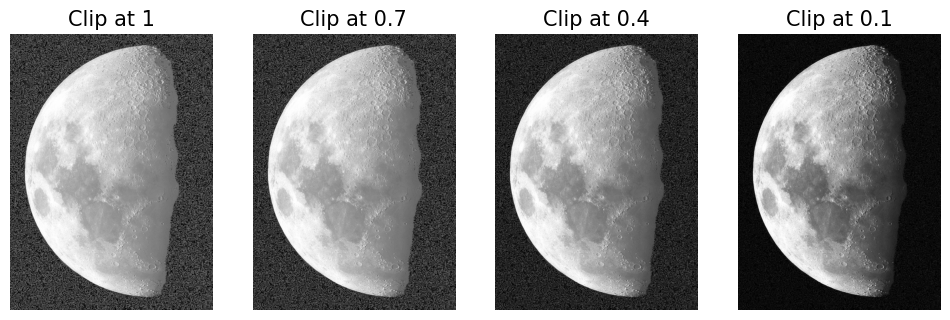

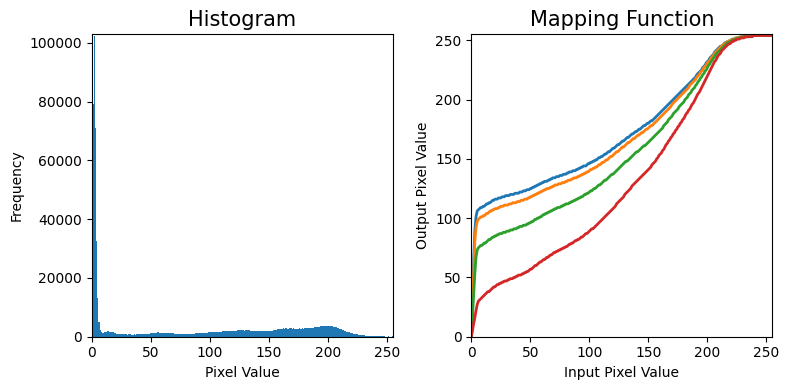

In [4]:
# Show images
fig, axes = plt.subplots(1, len(clip_ratios), figsize=(12, 4))
font_size = 15
for i, ax in enumerate(axes):
    ax.imshow(limited_eq_imgs[i], cmap='gray')
    ax.set_title(f'Clip at {clip_ratios[i]}', fontsize=font_size)
    ax.axis("off")

# Show histograms and mapping function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.bar(bins[:-1], hist, width=1)
ax1.set_xlim([0, 255])
ax1.set_ylim([0, max(hist) + 500])
ax1.set_xlabel('Pixel Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram', fontsize=font_size)

ax2.plot(luts.T, linewidth=2)
ax2.set_xlim([0, 255])
ax2.set_ylim([0, 255])
ax2.set_xlabel('Input Pixel Value')
ax2.set_ylabel('Output Pixel Value')
ax2.set_title('Mapping Function', fontsize=font_size)
plt.tight_layout()
plt.show()
